In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from datetime import datetime

In [3]:
stat_df = pd.read_csv('data/statipy_results.csv')
stat_df.head()

,Unnamed: 0,Track,Explicit,Tpopularity,Artist,Album,Rdate
0,0,Paradise,False,49,Voyage,Paradise,2018-02-14
1,1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24
2,2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03
3,3,Night,False,39,John Carpenter,Lost Themes,2015-02-03
4,4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17


###### drops unnamed axis

In [4]:
statidate_i = stat_df.drop('Unnamed: 0', axis=1)

###### changes Rdate to datetime index

In [5]:
statidate_i['Rdate']= pd.DatetimeIndex(statidate_i['Rdate'], freq='infer')

In [6]:
statidate_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 6 columns):
Track          991 non-null object
Explicit       991 non-null bool
Tpopularity    991 non-null int64
Artist         991 non-null object
Album          991 non-null object
Rdate          991 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 39.8+ KB


###### statidate_i entire playlist - plus all freq columns add here:

In [7]:
statidate_i['artsongcnt'] = statidate_i.groupby('Artist')['Track'].transform('count')

In [8]:
statidate_i['songfreq'] = statidate_i.groupby('Track')['Track'].transform('count')

In [9]:
statidate_i['datefreq'] = statidate_i.groupby('Rdate')['Track'].transform('count')

In [10]:
statidate_i.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03,1,1,2
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03,1,1,2
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1,1,1


##### tracks featured more than 3, 2, 1

In [11]:
tr3 = statidate_i[statidate_i['songfreq']>=3]
tr3
tr2 = statidate_i[statidate_i['songfreq']==2]
tr2
tr1 = statidate_i[statidate_i['songfreq']<=1]
tr1

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03,1,1,2
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03,1,1,2
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1,1,1
7,Level Ya Pussy Up,False,49,Aja,Level Ya Pussy Up,2017-02-02,5,1,1
8,Pose,False,55,Naomi Smalls,Pose,2018-12-27,1,1,1
9,Bring It! - Tim Letteer Radio Edit,False,26,Manila Luzon,"Bring It!, Remixes, Pt. 1",2014-01-17,2,1,1
10,DRAG UP YOUR LIFE,False,48,RuPaul,DRAG UP YOUR LIFE,2018-03-02,88,1,4
11,1999,False,82,Charli XCX,1999,2018-10-05,2,1,2


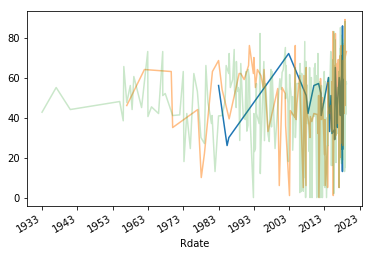

In [12]:
tr3.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=1)
tr2.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.50)
tr1.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.25)

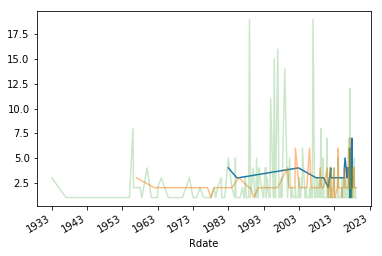

In [13]:
tr3.groupby(['Rdate'])['Explicit'].count().plot.line(stacked=True, alpha=1)
tr2.groupby(['Rdate'])['Explicit'].count().plot.line(stacked=True, alpha=0.50)
tr1.groupby(['Rdate'])['Explicit'].count().plot.line(stacked=True, alpha=0.25)

###### creates artdategroup (gb: art : date)

In [14]:
art_dategroupi = statidate_i.groupby(['Artist', 'Rdate'])
art_dategroupi
art_dategroupi.mean()

,,Explicit,Tpopularity,artsongcnt,songfreq,datefreq
Artist,Rdate,,,,,
!!!,2017-03-22,0.0,38.000000,2.0,2.000000,2.0
2Pac,2014-11-07,1.0,43.000000,1.0,1.000000,4.0
Aaron Copland,1960-01-01,0.0,50.000000,1.0,1.000000,4.0
Adam Joseph,2017-05-03,0.0,40.000000,1.0,1.000000,1.0
Adore Delano,2014-06-03,1.0,49.000000,1.0,1.000000,1.0
Adrianne Lenker,2018-10-05,0.0,58.000000,1.0,1.000000,2.0
Agnes Obel,2013-01-01,0.0,53.000000,1.0,1.000000,8.0
Ah-Mer-Ah-Su,2017-02-26,0.0,5.000000,2.0,2.000000,2.0
Aja,2017-02-02,0.0,49.000000,5.0,1.000000,1.0


###### Avg Artist's Release Date Info

In [15]:
art_desc = statidate_i.groupby(['Artist', 'Rdate', 'Explicit'])
art_desc.mean()

,,,Tpopularity,artsongcnt,songfreq,datefreq
Artist,Rdate,Explicit,,,,
!!!,2017-03-22,False,38.000000,2.0,2.000000,2.0
2Pac,2014-11-07,True,43.000000,1.0,1.000000,4.0
Aaron Copland,1960-01-01,False,50.000000,1.0,1.000000,4.0
Adam Joseph,2017-05-03,False,40.000000,1.0,1.000000,1.0
Adore Delano,2014-06-03,True,49.000000,1.0,1.000000,1.0
Adrianne Lenker,2018-10-05,False,58.000000,1.0,1.000000,2.0
Agnes Obel,2013-01-01,False,53.000000,1.0,1.000000,8.0
Ah-Mer-Ah-Su,2017-02-26,False,5.000000,2.0,2.000000,2.0
Aja,2017-02-02,False,49.000000,5.0,1.000000,1.0


###### describes date bins per gb art date

In [16]:
art_dategroupi[['datefreq']].describe()

datefreq                                   
                                      count mean  std  min  25%  50%  75%  max
Artist                  Rdate                                                 
!!!                     2017-03-22      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
2Pac                    2014-11-07      1.0  4.0  NaN  4.0  4.0  4.0  4.0  4.0
Aaron Copland           1960-01-01      1.0  4.0  NaN  4.0  4.0  4.0  4.0  4.0
Adam Joseph             2017-05-03      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Adore Delano            2014-06-03      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Adrianne Lenker         2018-10-05      1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0
Agnes Obel              2013-01-01      1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0
Ah-Mer-Ah-Su            2017-02-26      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Aja                     2017-02-02      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2017-04-21      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2018-03-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2018-05-07      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2018-10-17      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Al B. Sure!             1988-04-26      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Alabama Shakes          2012-01-01      1.0  9.0  NaN  9.0  9.0  9.0  9.0  9.0
                        2015-04-21      3.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
Alaska Thunderfuck      2015-06-23      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
                        2016-10-14      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Alban Berg              2012-01-01      1.0  9.0  NaN  9.0  9.0  9.0  9.0  9.0
Alice Cooper            1972-01-01      1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0
Allen Toussaint         1975-01-01      1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0
Amadou & Mariam         2008-11-17      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Amara La Negra          2018-02-20      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Angel Haze              2012-01-01      4.0  9.0  0.0  9.0  9.0  9.0  9.0  9.0
Angel Olsen             2016-09-02      1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0
Anita O'Day             1941-01-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        1955-01-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        1961-03-14      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2015-02-12      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Antonio Vivaldi         2014-01-01      1.0  7.0  NaN  7.0  7.0  7.0  7.0  7.0
...                                     ...  ...  ...  ...  ...  ...  ...  ...
Whitney Houston         2006-05-02      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Wilbert Harrison        2007-10-09      2.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
Willam                  2013-04-18      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2015-06-02      1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0
Willie Mitchell         2014-01-01      1.0  7.0  NaN  7.0  7.0  7.0  7.0  7.0
Willow                  2010-10-26      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Wilson Pickett          1966-01-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2017-11-24      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Wolfgang Amadeus Mozart 1995-11-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2004-01-01      1.0  6.0  NaN  6.0  6.0  6.0  6.0  6.0
                        2006-06-05      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2011-02-08      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Wynona Carr             1993-01-01      1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0
Wynonie Harris          2014-04-19      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
XXXTENTACION            2018-10-25      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Yeah Yeah Yeahs         2002-01-01      2.0  8.0  0.0  8.0  8.0  8.0  8.0  8.0
                        2003-04-29      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
      

###### sets date freq variables

In [17]:
freqdates = statidate_i[statidate_i['datefreq']>=8]
maxfreqdates = statidate_i[statidate_i['datefreq']>=15]
minfreqdates = statidate_i[statidate_i['datefreq']==1]

In [18]:
date_i = freqdates.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'datefreq']].mean()
date_max = maxfreqdates.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'datefreq']].mean()
date_max

,Explicit,Tpopularity,datefreq
Rdate,,,
1989-01-01,0.000000,28.526316,19.0
1996-01-01,0.000000,28.466667,15.0
1997-01-01,0.000000,31.888889,18.0
2007-01-01,0.142857,3.333333,21.0
2017-06-09,0.100000,43.400000,20.0


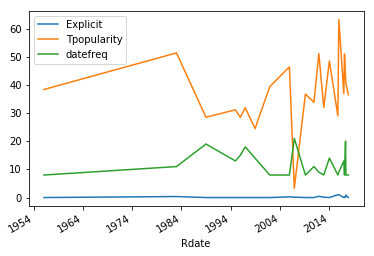

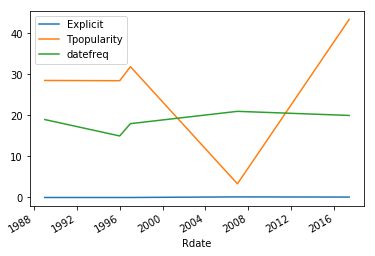

In [19]:
date_i.plot()
date_max.plot()

###### changes Rdate to year

In [20]:
alldates_i = statidate_i[['Track', 'Explicit', 'Tpopularity', 'Artist', 'Rdate', 'artsongcnt', 'songfreq', 'datefreq']]
alldates_i.head()

,Track,Explicit,Tpopularity,Artist,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,2018-02-14,1,1,1
1,Tech Noir,False,56,Gunship,2015-07-24,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,2015-02-03,1,1,2
3,Night,False,39,John Carpenter,2015-02-03,1,1,2
4,Depth Charge,False,5,Flume,2017-02-17,1,1,1


In [21]:
alldates_i['Rdate'] = pd.DatetimeIndex(alldates_i['Rdate']).year

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
alldates_i.head()

,Track,Explicit,Tpopularity,Artist,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,2018,1,1,1
1,Tech Noir,False,56,Gunship,2015,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,2015,1,1,2
3,Night,False,39,John Carpenter,2015,1,1,2
4,Depth Charge,False,5,Flume,2017,1,1,1


###### ALL DATES : avg tracks in date bin (datefreq), avg explicit tracks in date bin, avg track popularity in date bin

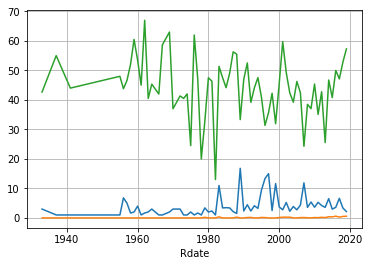

In [39]:
alldates_i.groupby('Rdate')['datefreq'].mean().plot.line(stacked=True, grid=True)
alldates_i.groupby('Rdate')['Explicit'].mean().plot.line(stacked=True, grid=True)
alldates_i.groupby('Rdate')['Tpopularity'].mean().plot.line(stacked=True, grid=True)

###### creates var for date freq of yearRDate df

In [49]:
mindate = alldates_i[alldates_i['datefreq']==1]
mindate.head()

,Track,Explicit,Tpopularity,Artist,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,2018,1,1,1
1,Tech Noir,False,56,Gunship,2015,1,1,1
4,Depth Charge,False,5,Flume,2017,1,1,1
7,Level Ya Pussy Up,False,49,Aja,2017,5,1,1
8,Pose,False,55,Naomi Smalls,2018,1,1,1


In [41]:
date_min = mindate.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'datefreq']].mean()

date_min['Tpopularity'].describe()

count    50.000000
mean     47.130958
std      14.042714
min       0.000000
25%      42.000000
50%      46.750000
75%      55.375000
max      73.000000
Name: Tpopularity, dtype: float64

In [50]:
len(date_min)

50

In [42]:
toppop_datemin = mindate[mindate['Tpopularity']>=64]

lowpop_datemin = mindate[mindate['Tpopularity']<=17]
len(lowpop_datemin)

29

In [51]:
len(toppop_datemin)

29

In [44]:
tpdm = toppop_datemin
lpdm = lowpop_datemin

In [45]:
lpdm.groupby('Rdate')['Explicit'].count()

Rdate
1978    1
1982    1
1992    1
1994    1
2006    1
2007    2
2008    2
2010    2
2011    5
2012    2
2013    4
2014    1
2015    2
2017    2
2018    2
Name: Explicit, dtype: int64

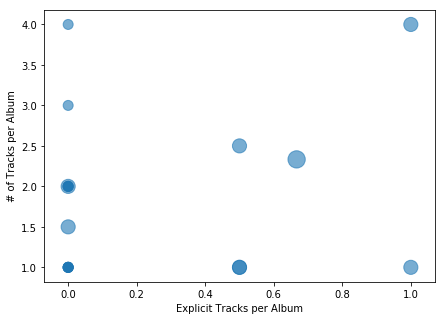

In [46]:
x = tpdm.groupby('Rdate')['Explicit'].mean()
y = tpdm.groupby('Rdate')['artsongcnt'].mean()
s = tpdm.groupby('Rdate')['Explicit'].count()

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x, y, s*100, alpha=0.60);
ax.set_xlabel('Explicit Tracks per Album')
ax.set_ylabel('# of Tracks per Album')

plt.show()

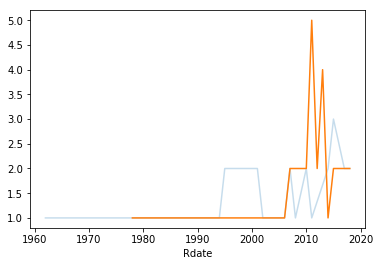

In [47]:
tpdm.groupby('Rdate')['datefreq'].count().plot.line(stacked=True, alpha=.25)
lpdm.groupby('Rdate')['datefreq'].count().plot.line(stacked=True)